# zoomy

## imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data

In [2]:
df = pd.read_csv("/Users/joseph/code/Ward-cloud/project/venezuela_fx/venezuela_fx/data/working_df.csv")

In [3]:
df.keys()

Index(['Unnamed: 0', 'Stock_Market', 'Deposit_Interest_Rate', 'Interest_Rate',
       'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Crude_Oil_Production',
       'Crude_Oil_Rig', 'Money_Supply_M0', 'Foreign_Exchange_Reserve',
       'External_Debt', 'Inflation_Rate', 'Money_Supply_M2',
       'Inflation_Rate_Mom', 'Private_Sector_Credit',
       'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Money_Supply_M1',
       'Banks_Balance_Sheet', 'Dolartoday'],
      dtype='object')

(5000.0, 5600.0)

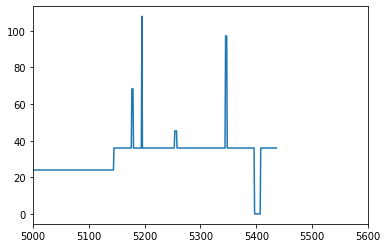

In [4]:
plt.plot(df['Deposit_Interest_Rate'])
plt.xlim(5000,5600)

In [5]:
df['Unnamed: 0'] = df['Unnamed: 0'].apply(pd.to_datetime)

In [6]:
df.rename(columns = {'Unnamed: 0':'date'}, inplace=True)

In [7]:
df = df.set_index('date')

In [8]:
df.keys()

Index(['Stock_Market', 'Deposit_Interest_Rate', 'Interest_Rate',
       'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Crude_Oil_Production',
       'Crude_Oil_Rig', 'Money_Supply_M0', 'Foreign_Exchange_Reserve',
       'External_Debt', 'Inflation_Rate', 'Money_Supply_M2',
       'Inflation_Rate_Mom', 'Private_Sector_Credit',
       'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Money_Supply_M1',
       'Banks_Balance_Sheet', 'Dolartoday'],
      dtype='object')

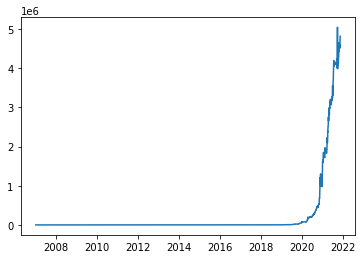

In [9]:
plt.plot(df['Dolartoday'])

In [10]:
working_df = df[df.index>='2016-01-01']

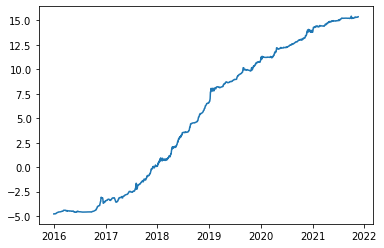

In [11]:
plt.plot(np.log(working_df['Dolartoday']))

In [12]:
working_df.shape

(2150, 19)

### Mergin in monetary Data

In [13]:
# mon = pd.read_excel('/Users/joseph/code/Ward-cloud/project/venezuela_fx/venezuela_fx/data/monetary_data_v2.xlsx')

# tr_mon = mon.T

# new_header = tr_mon.iloc[0]
# tr_mon = tr_mon[1:]
# tr_mon.columns = new_header

# tr_mon['Date'] = tr_mon['Date'].apply(pd.to_datetime)

# tr_mon.head()

# tr_mon.dtypes

# tr_mon.set_index('Date')

# tr.mon.drop(columns=['Year', 'Month'])

In [14]:
data = pd.read_csv('/Users/joseph/code/Ward-cloud/project/venezuela_fx/venezuela_fx/data/merge.csv')

data.keys()

Index(['Unnamed: 0', 'Year_x', 'Month_x', 'Dolartoday', 'Source', 'Oil WTI',
       'Oil Brent', 'month', 'year', 'BM (BsS)', 'M2 (BsS)', 'Year_y',
       'Month_y', 'Inflation (oppo)', 'Inflation (bcv)',
       'Recaudacion SENIAT (BsF miles)', 'Oil Production'],
      dtype='object')

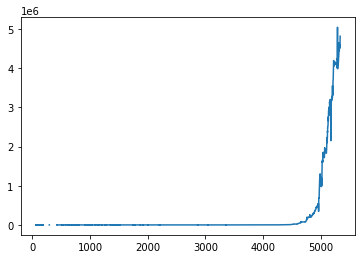

In [56]:
plt.plot(data['Dolartoday'])


In [17]:
data.rename(columns = {'Unnamed: 0':'date'}, inplace=True)

data['date'] = data['date'].apply(pd.to_datetime)

# test = data[['date', 'Recaudacion SENIAT (BsF miles)']].dropna()

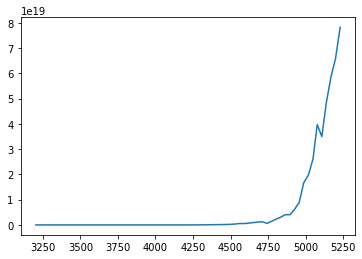

In [18]:
plt.plot(test.iloc[108:]['Recaudacion SENIAT (BsF miles)'])

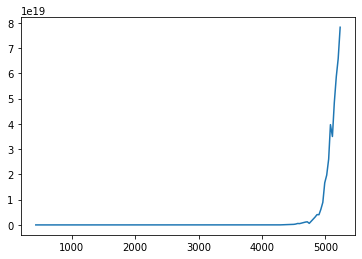

In [19]:
plt.plot(test['Recaudacion SENIAT (BsF miles)'])

In [20]:
data.dtypes

date                              datetime64[ns]
Year_x                                   float64
Month_x                                  float64
Dolartoday                               float64
Source                                    object
Oil WTI                                  float64
Oil Brent                                float64
month                                    float64
year                                     float64
BM (BsS)                                 float64
M2 (BsS)                                 float64
Year_y                                   float64
Month_y                                   object
Inflation (oppo)                         float64
Inflation (bcv)                          float64
Recaudacion SENIAT (BsF miles)           float64
Oil Production                           float64
dtype: object

In [21]:
merger = data[['date', 'BM (BsS)', 'M2 (BsS)']]

In [22]:
merger.set_index('date', inplace=True)

In [23]:
len(merger)

5340

In [24]:
merger.isna().sum()

BM (BsS)    4233
M2 (BsS)    4233
dtype: int64

In [25]:
merger_check = merger.dropna()

In [26]:
merger_check.iloc[790:810]

,BM (BsS),M2 (BsS)
date,,
2015-10-30,1.201306e+07,33136840.00
2015-11-06,1.214965e+07,33572461.23
2015-11-13,1.357611e+07,35503912.99
2015-11-20,1.412517e+07,36045009.11
2015-11-27,1.475887e+07,37160484.98
2015-12-04,1.531443e+07,38167273.33
2015-12-11,1.527001e+07,38821059.97
2015-12-18,1.540552e+07,39449838.04
2015-12-25,1.542338e+07,39553068.58


In [27]:
merged_df = pd.merge(working_df, merger, how='left', left_index=True, right_index=True).fillna(method=('ffill'))

In [28]:
merged_df.keys()

Index(['Stock_Market', 'Deposit_Interest_Rate', 'Interest_Rate',
       'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Crude_Oil_Production',
       'Crude_Oil_Rig', 'Money_Supply_M0', 'Foreign_Exchange_Reserve',
       'External_Debt', 'Inflation_Rate', 'Money_Supply_M2',
       'Inflation_Rate_Mom', 'Private_Sector_Credit',
       'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Money_Supply_M1',
       'Banks_Balance_Sheet', 'Dolartoday', 'BM (BsS)', 'M2 (BsS)'],
      dtype='object')

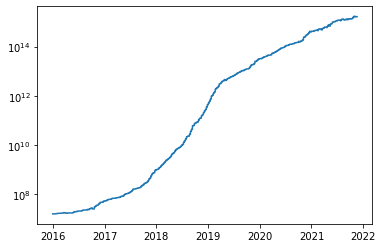

In [29]:
plt.plot(merged_df['BM (BsS)'])
plt.yscale('log')

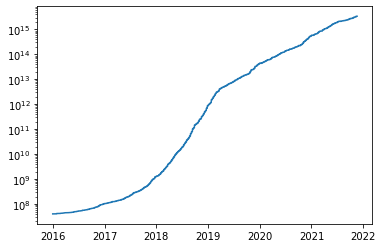

In [30]:
plt.plot(merged_df['M2 (BsS)'])
plt.yscale('log')

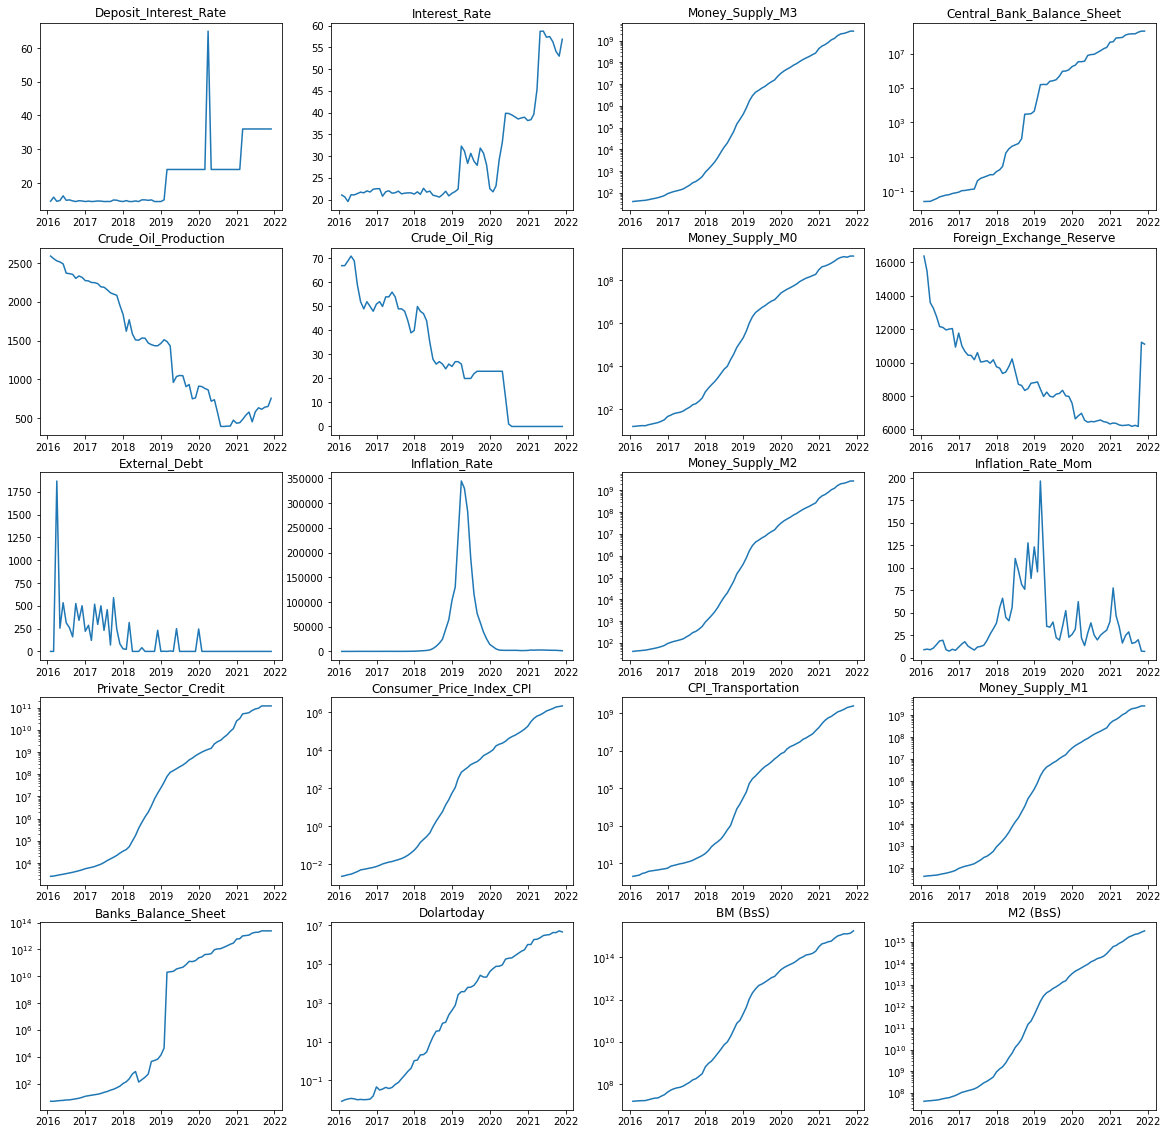

In [31]:
log_cols = ['Money_Supply_M0', 'Money_Supply_M1', 'Money_Supply_M2', 'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Private_Sector_Credit', 'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Banks_Balance_Sheet', 'Dolartoday', 'BM (BsS)', 'M2 (BsS)']
fig, axs = plt.subplots(5,4, figsize=(20,20))
axs = axs.flatten()
for idx, col in enumerate(list(merged_df.columns[1:])):
    axs[idx].plot(merged_df.resample('m').first()[col])
    axs[idx].set_title(col)
    if col in log_cols:
        axs[idx].set_yscale('log')

In [32]:
working_df = merged_df

## Dropping weekends

In [33]:
working_df = working_df[working_df.index.dayofweek < 5]

In [ ]:
working_df

In [34]:
working_df.shape

(1537, 21)

### Resample by hour

In [35]:
working_df

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,...,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday,BM (BsS),M2 (BsS)
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1.458830e+01,14.59,21.03,4.015700e+01,2.440000e-02,2591.0,67.0,1.600900e+01,16370.0,0.0,...,4.015700e+01,8.7,2.539260e+03,2.300000e-03,1.995100e+00,3.932100e+01,4.950000e+00,8.333300e-03,1.600945e+07,4.028562e+07
2016-01-04,1.458830e+01,14.94,21.03,4.015700e+01,2.440000e-02,2591.0,67.0,1.600900e+01,16370.0,0.0,...,4.015700e+01,8.7,2.539260e+03,2.300000e-03,1.995100e+00,3.932100e+01,4.950000e+00,8.450700e-03,1.600945e+07,4.028562e+07
2016-01-05,1.474840e+01,15.09,21.03,4.015700e+01,2.440000e-02,2591.0,67.0,1.600900e+01,16370.0,0.0,...,4.015700e+01,8.7,2.539260e+03,2.300000e-03,1.995100e+00,3.932100e+01,4.950000e+00,8.450700e-03,1.600945e+07,4.028562e+07
2016-01-06,1.459130e+01,15.24,21.03,4.015700e+01,2.440000e-02,2591.0,67.0,1.600900e+01,16370.0,0.0,...,4.015700e+01,8.7,2.539260e+03,2.300000e-03,1.995100e+00,3.932100e+01,4.950000e+00,8.388900e-03,1.600945e+07,4.028562e+07
2016-01-07,1.459130e+01,16.21,21.03,4.015700e+01,2.440000e-02,2591.0,67.0,1.600900e+01,16370.0,0.0,...,4.015700e+01,8.7,2.539260e+03,2.300000e-03,1.995100e+00,3.932100e+01,4.950000e+00,8.388900e-03,1.600945e+07,4.028562e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-15,5.973510e+09,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,...,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.610000e+06,1.650503e+15,3.372106e+15
2021-11-16,5.962450e+09,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,...,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.690000e+06,1.650503e+15,3.372106e+15
2021-11-17,5.968420e+09,36.00,56.86,2.725926e+09,2.031504e+08,756.0,0.0,1.325000e+09,11102.0,0.0,...,2.725926e+09,6.8,1.184882e+11,2.210425e+06,2.512177e+09,2.720677e+09,2.392883e+13,4.820000e+06,1.650503e+15,3.372106e+15


In [59]:
hourly_df = working_df.resample('h').mean().fillna(method='ffill')

In [61]:
int_hourly_df = working_df.resample('h').mean().interpolate()

In [60]:
hourly_df.head()

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,...,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday,BM (BsS),M2 (BsS)
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,14.5883,14.590000,21.03,40.157,0.0244,2591.0,67.0,16.009,16370.0,0.0,...,40.157,8.7,2539.26,0.0023,1.9951,39.321,4.95,0.008333,1.600945e+07,40285616.77
2016-01-01 01:00:00,14.5883,14.594861,21.03,40.157,0.0244,2591.0,67.0,16.009,16370.0,0.0,...,40.157,8.7,2539.26,0.0023,1.9951,39.321,4.95,0.008335,1.600945e+07,40285616.77
2016-01-01 02:00:00,14.5883,14.599722,21.03,40.157,0.0244,2591.0,67.0,16.009,16370.0,0.0,...,40.157,8.7,2539.26,0.0023,1.9951,39.321,4.95,0.008337,1.600945e+07,40285616.77
2016-01-01 03:00:00,14.5883,14.604583,21.03,40.157,0.0244,2591.0,67.0,16.009,16370.0,0.0,...,40.157,8.7,2539.26,0.0023,1.9951,39.321,4.95,0.008338,1.600945e+07,40285616.77
2016-01-01 04:00:00,14.5883,14.609444,21.03,40.157,0.0244,2591.0,67.0,16.009,16370.0,0.0,...,40.157,8.7,2539.26,0.0023,1.9951,39.321,4.95,0.008340,1.600945e+07,40285616.77


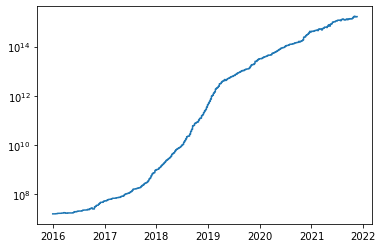

In [38]:
plt.plot(hourly_df['BM (BsS)'])
plt.yscale('log')

### White noise

In [39]:
hourly_df = working_df.resample('h').mean().pad()

In [40]:
hourly_df.shape[0]

51577

In [41]:
white_noise = np.random.normal(0,0.1,size=(hourly_df.shape[0]))

In [42]:
tiny_noise = np.random.normal(0,0.00001, size=(hourly_df['Dolartoday'].shape[0]))

In [43]:
for col in hourly_df:
    if hourly_df[col].max() - hourly_df[col].min() > 10000:
        hourly_df[col] = hourly_df[col] + tiny_noise
    else:
        hourly_df[col] = hourly_df[col] + white_noise

In [44]:
hourly_df[['Deposit_Interest_Rate']]

,Deposit_Interest_Rate
date,
2016-01-01 00:00:00,14.572123
2016-01-01 01:00:00,14.732452
2016-01-01 02:00:00,14.622912
2016-01-01 03:00:00,14.694971
2016-01-01 04:00:00,14.559630
...,...
2021-11-18 20:00:00,35.979894
2021-11-18 21:00:00,35.870786
2021-11-18 22:00:00,35.870510


In [45]:
merged_df[['Deposit_Interest_Rate']]

,Deposit_Interest_Rate
date,
2016-01-01,14.59
2016-01-02,14.59
2016-01-03,14.59
2016-01-04,14.94
2016-01-05,15.09
...,...
2021-11-15,36.00
2021-11-16,36.00
2021-11-17,36.00


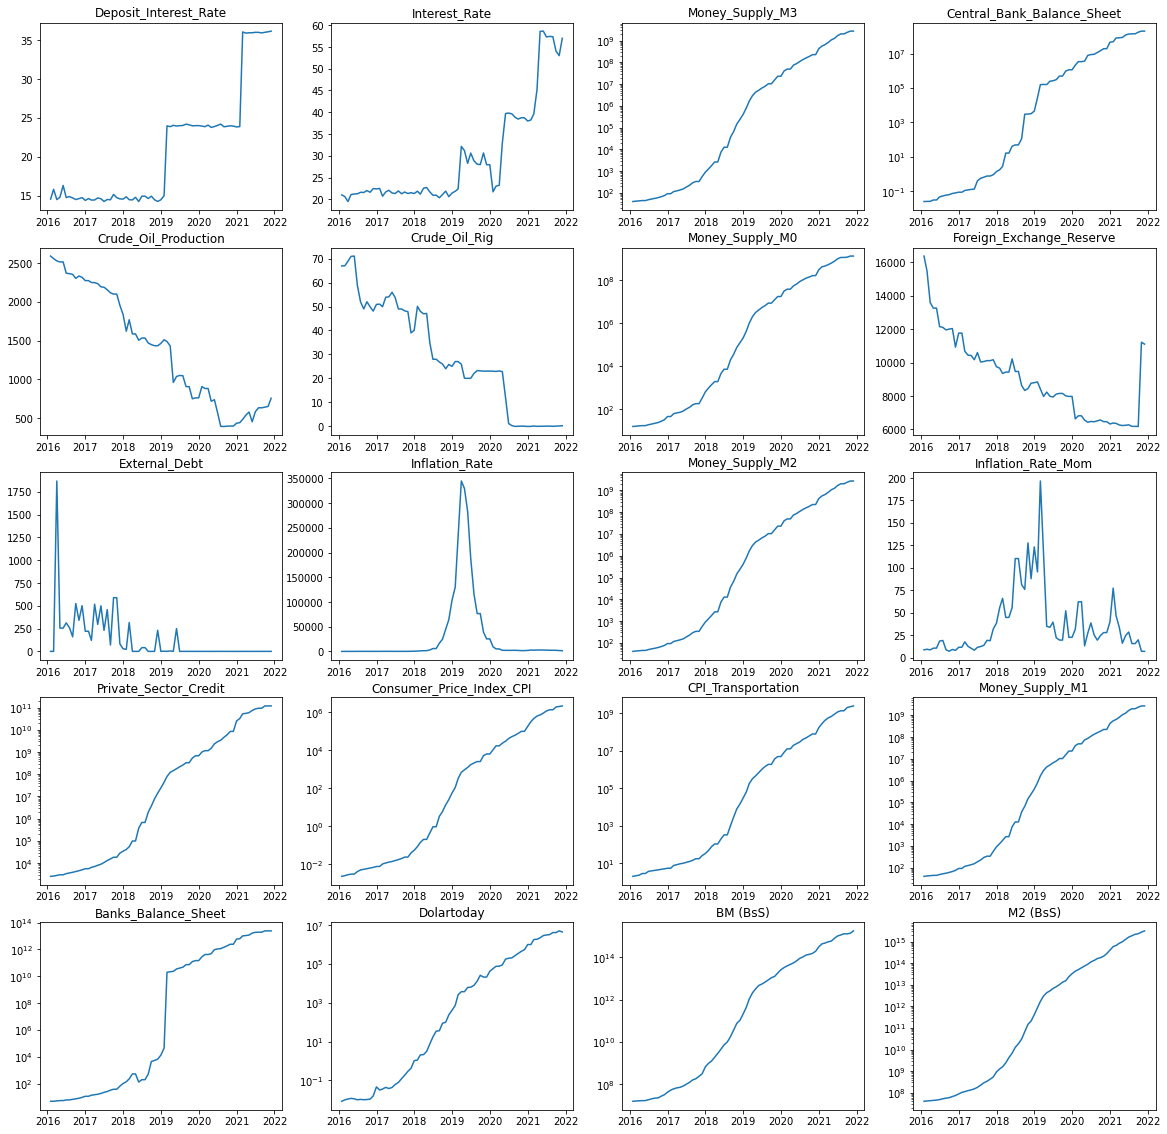

In [46]:
log_cols = ['Money_Supply_M0', 'Money_Supply_M1', 'Money_Supply_M2', 'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Private_Sector_Credit', 'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Banks_Balance_Sheet', 'Dolartoday', 'BM (BsS)', 'M2 (BsS)']
fig, axs = plt.subplots(5,4, figsize=(20,20))
axs = axs.flatten()
for idx, col in enumerate(list(hourly_df.columns[1:])):
    axs[idx].plot(hourly_df.resample('m').first()[col])
    axs[idx].set_title(col)
    if col in log_cols:
        axs[idx].set_yscale('log')

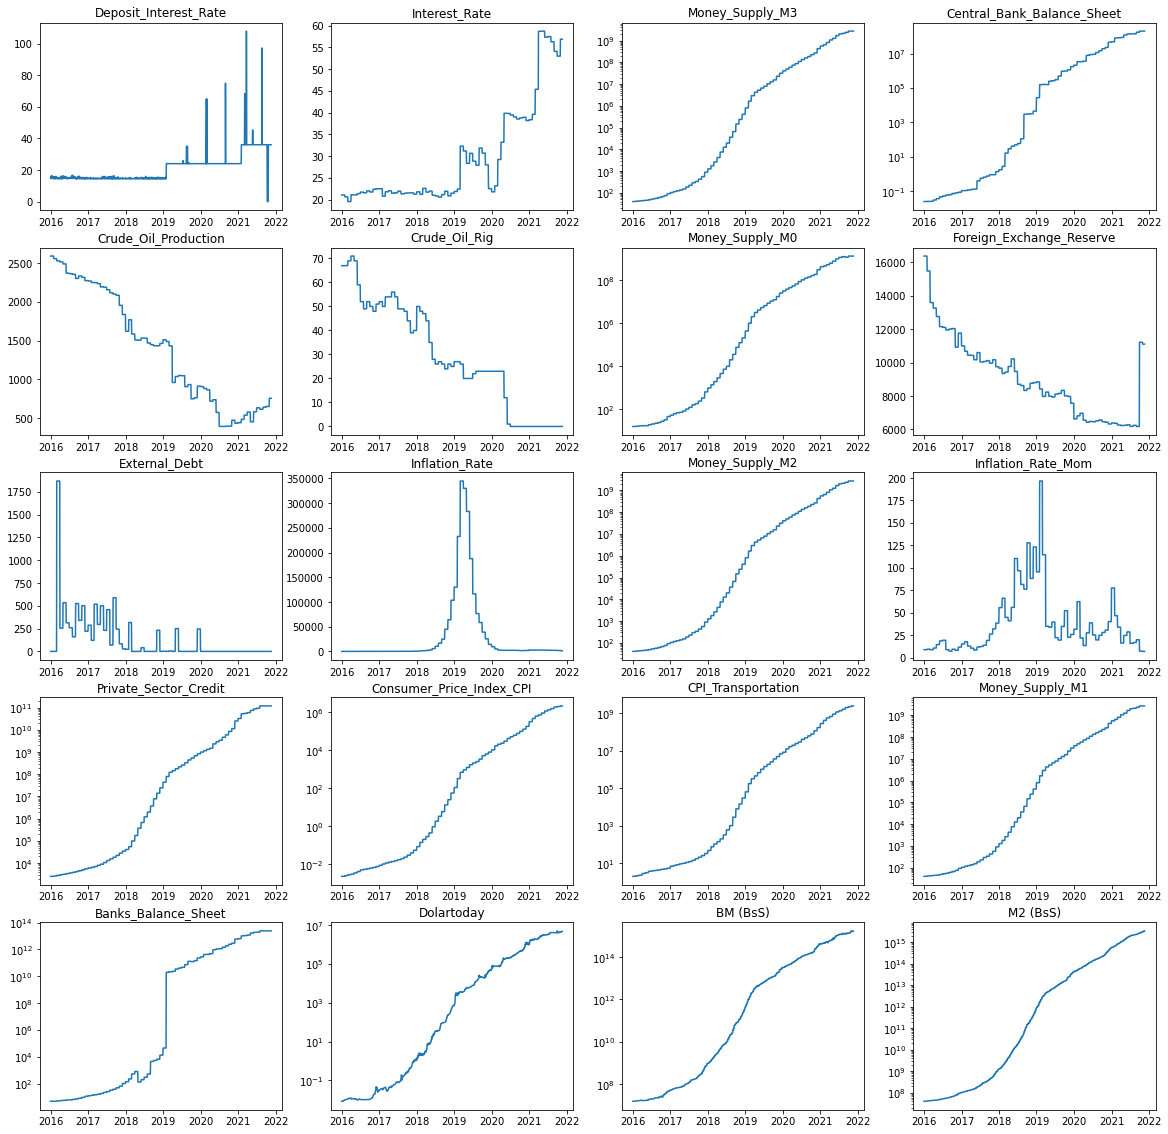

In [47]:
log_cols = ['Money_Supply_M0', 'Money_Supply_M1', 'Money_Supply_M2', 'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Private_Sector_Credit', 'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Banks_Balance_Sheet', 'Dolartoday', 'BM (BsS)', 'M2 (BsS)']
fig, axs = plt.subplots(5,4, figsize=(20,20))
axs = axs.flatten()
for idx, col in enumerate(list(merged_df.columns[1:])):
    axs[idx].plot(merged_df.resample('d').first()[col])
    axs[idx].set_title(col)
    if col in log_cols:
        axs[idx].set_yscale('log')

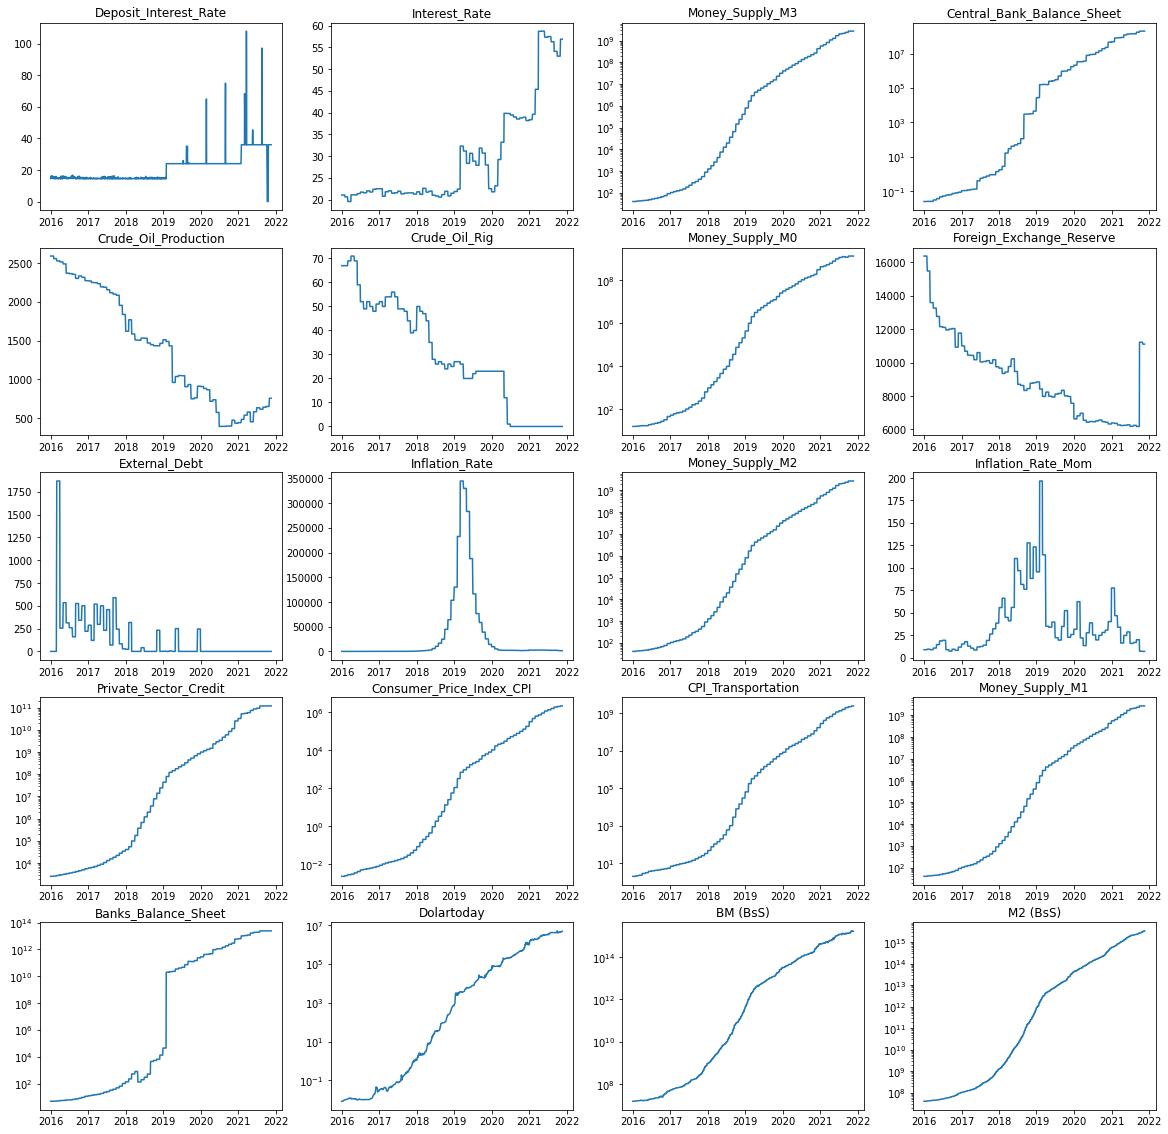

In [62]:
log_cols = ['Money_Supply_M0', 'Money_Supply_M1', 'Money_Supply_M2', 'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Private_Sector_Credit', 'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Banks_Balance_Sheet', 'Dolartoday', 'BM (BsS)', 'M2 (BsS)']
fig, axs = plt.subplots(5,4, figsize=(20,20))
axs = axs.flatten()
for idx, col in enumerate(list(merged_df.columns[1:])):
    axs[idx].plot(int_hourly_df.resample('d').first()[col])
    axs[idx].set_title(col)
    if col in log_cols:
        axs[idx].set_yscale('log')

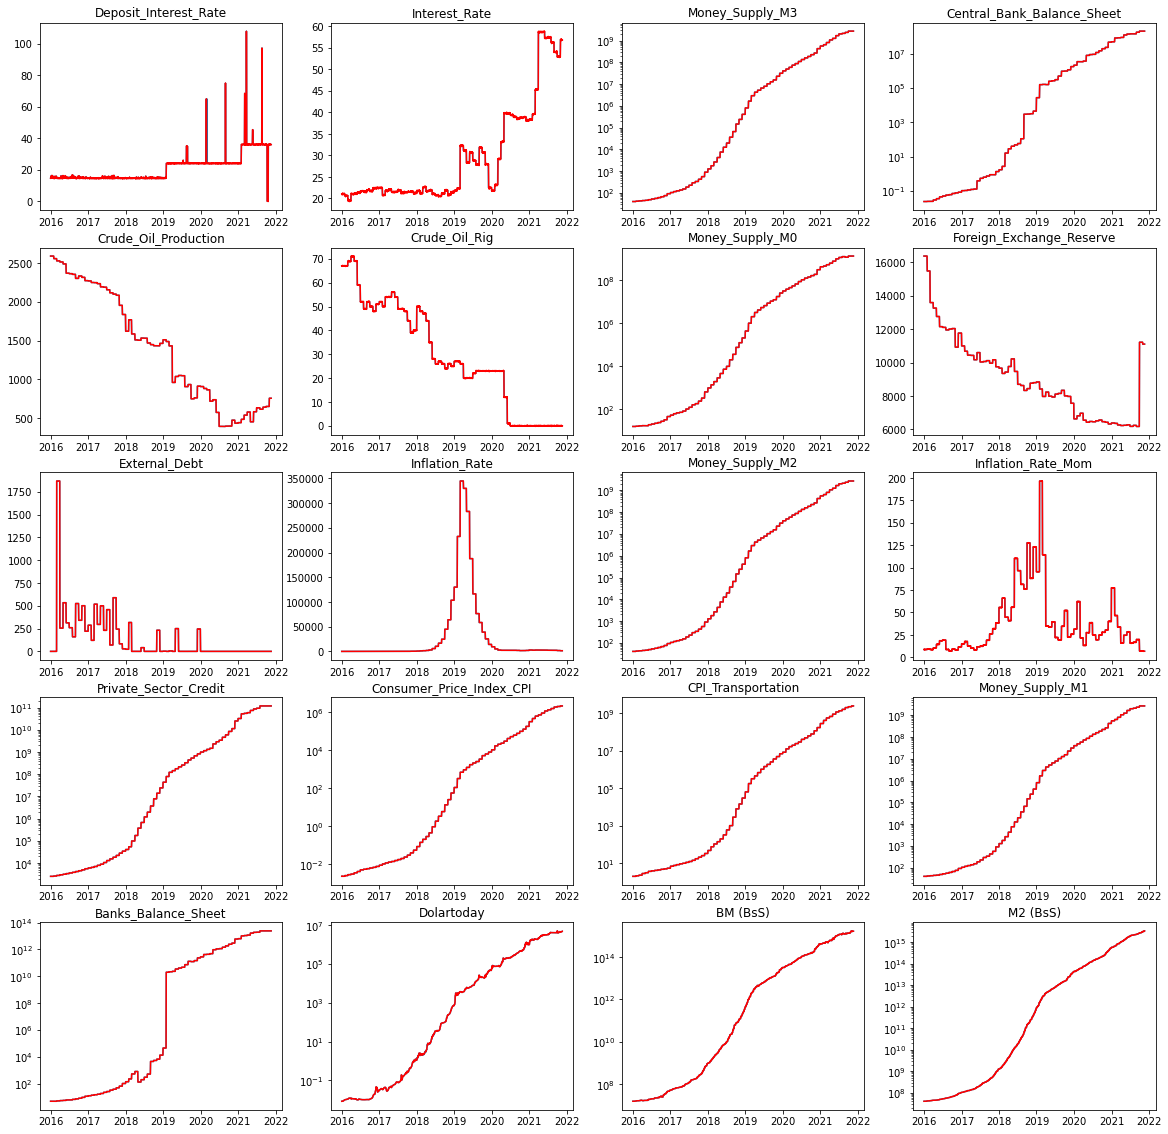

In [48]:
log_cols = ['Money_Supply_M0', 'Money_Supply_M1', 'Money_Supply_M2', 'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Private_Sector_Credit', 'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Banks_Balance_Sheet', 'Dolartoday', 'BM (BsS)', 'M2 (BsS)']
fig, axs = plt.subplots(5,4, figsize=(20,20))
axs = axs.flatten()
for idx, col in enumerate(list(merged_df.columns[1:])):
    axs[idx].plot(merged_df.resample('d').first()[col])
    axs[idx].plot(hourly_df.resample('d').first()[col], color='red')
    axs[idx].set_title(col)
    if col in log_cols:
        axs[idx].set_yscale('log')

In [49]:
hourly_df.head()

,Stock_Market,Deposit_Interest_Rate,Interest_Rate,Money_Supply_M3,Central_Bank_Balance_Sheet,Crude_Oil_Production,Crude_Oil_Rig,Money_Supply_M0,Foreign_Exchange_Reserve,External_Debt,...,Money_Supply_M2,Inflation_Rate_Mom,Private_Sector_Credit,Consumer_Price_Index_CPI,CPI_Transportation,Money_Supply_M1,Banks_Balance_Sheet,Dolartoday,BM (BsS),M2 (BsS)
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,14.588296,14.572123,21.012123,40.156996,0.024396,2590.982123,66.982123,16.008996,16369.999996,-0.017877,...,40.156996,8.682123,2539.259996,0.002296,1.995096,39.320996,4.949996,0.008329,1.600945e+07,4.028562e+07
2016-01-01 01:00:00,14.588293,14.732452,21.172452,40.156993,0.024393,2591.142452,67.142452,16.008993,16369.999993,0.142452,...,40.156993,8.842452,2539.259993,0.002293,1.995093,39.320993,4.949993,0.008327,1.600945e+07,4.028562e+07
2016-01-01 02:00:00,14.588305,14.622912,21.062912,40.157005,0.024405,2591.032912,67.032912,16.009005,16370.000005,0.032912,...,40.157005,8.732912,2539.260005,0.002305,1.995105,39.321005,4.950005,0.008338,1.600945e+07,4.028562e+07
2016-01-01 03:00:00,14.588278,14.694971,21.134971,40.156978,0.024378,2591.104971,67.104971,16.008978,16369.999978,0.104971,...,40.156978,8.804971,2539.259978,0.002278,1.995078,39.320978,4.949978,0.008311,1.600945e+07,4.028562e+07
2016-01-01 04:00:00,14.588300,14.559630,20.999630,40.157000,0.024400,2590.969630,66.969630,16.009000,16370.000000,-0.030370,...,40.157000,8.669630,2539.260000,0.002300,1.995100,39.321000,4.950000,0.008333,1.600945e+07,4.028562e+07


### data to CSV

In [50]:
hourly_df.to_csv('/Users/joseph/code/Ward-cloud/project/venezuela_fx/venezuela_fx/data/friday_feeling_df.csv')

In [51]:
hourly_df.shape

(51577, 21)

In [65]:
int_hourly_df.to_csv('/Users/joseph/code/Ward-cloud/project/venezuela_fx/venezuela_fx/data/friday_feeling_df.csv')

In [66]:
int_hourly_df.shape

(51577, 21)

### Zooming out df

In [67]:
working_df = df[df.index>='2012-01-01']

In [68]:
data = pd.read_csv('/Users/joseph/code/Ward-cloud/project/venezuela_fx/venezuela_fx/data/merge.csv')

In [69]:
data.rename(columns = {'Unnamed: 0':'date'}, inplace=True)

data['date'] = data['date'].apply(pd.to_datetime)

In [70]:
merger = data[['date', 'BM (BsS)', 'M2 (BsS)']]

In [71]:
merger.set_index('date', inplace=True)

In [72]:
merged_df = pd.merge(working_df, merger, how='left', left_index=True, right_index=True).fillna(method=('ffill'))

In [74]:
merged_df.keys()

Index(['Stock_Market', 'Deposit_Interest_Rate', 'Interest_Rate',
       'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Crude_Oil_Production',
       'Crude_Oil_Rig', 'Money_Supply_M0', 'Foreign_Exchange_Reserve',
       'External_Debt', 'Inflation_Rate', 'Money_Supply_M2',
       'Inflation_Rate_Mom', 'Private_Sector_Credit',
       'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Money_Supply_M1',
       'Banks_Balance_Sheet', 'Dolartoday', 'BM (BsS)', 'M2 (BsS)'],
      dtype='object')

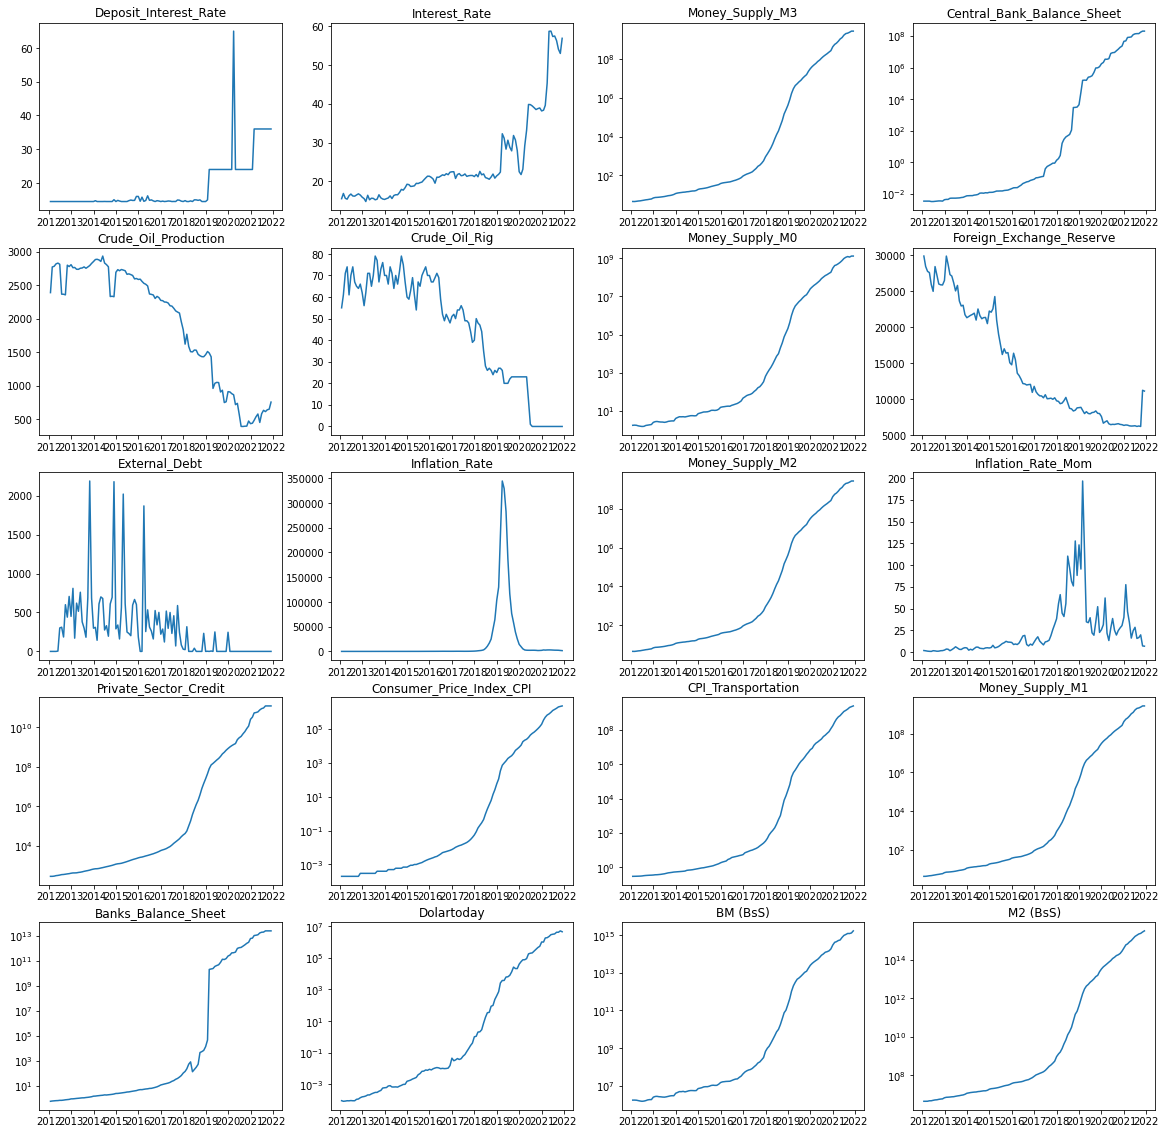

In [75]:
log_cols = ['Money_Supply_M0', 'Money_Supply_M1', 'Money_Supply_M2', 'Money_Supply_M3', 'Central_Bank_Balance_Sheet', 'Private_Sector_Credit', 'Consumer_Price_Index_CPI', 'CPI_Transportation', 'Banks_Balance_Sheet', 'Dolartoday', 'BM (BsS)', 'M2 (BsS)']
fig, axs = plt.subplots(5,4, figsize=(20,20))
axs = axs.flatten()
for idx, col in enumerate(list(merged_df.columns[1:])):
    axs[idx].plot(merged_df.resample('m').first()[col])
    axs[idx].set_title(col)
    if col in log_cols:
        axs[idx].set_yscale('log')

In [76]:
merged_df = working_df[working_df.index.dayofweek < 5]

In [77]:
int_hourly_df = working_df.resample('h').mean().interpolate()

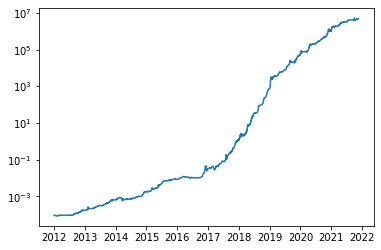

In [80]:
plt.plot(int_hourly_df['Dolartoday'])
plt.yscale('log')

In [83]:
int_hourly_df.isna().sum()

Stock_Market                  0
Deposit_Interest_Rate         0
Interest_Rate                 0
Money_Supply_M3               0
Central_Bank_Balance_Sheet    0
Crude_Oil_Production          0
Crude_Oil_Rig                 0
Money_Supply_M0               0
Foreign_Exchange_Reserve      0
External_Debt                 0
Inflation_Rate                0
Money_Supply_M2               0
Inflation_Rate_Mom            0
Private_Sector_Credit         0
Consumer_Price_Index_CPI      0
CPI_Transportation            0
Money_Supply_M1               0
Banks_Balance_Sheet           0
Dolartoday                    0
dtype: int64

In [84]:
int_hourly_df.to_csv('/Users/joseph/code/Ward-cloud/project/venezuela_fx/venezuela_fx/data/since_2012_master.csv')

In [85]:
int_hourly_df.shape

(86641, 19)